In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
import sys

sys.path.insert(1,'C:/Users/chris/CU-Repositories/')

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
  
    # Run an API request for each of the cities.
    try:
    # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | lagoa
Processing Record 2 of Set 13 | vostok
Processing Record 3 of Set 13 | orange
Processing Record 4 of Set 13 | hamilton
Processing Record 5 of Set 13 | teahupoo
Processing Record 6 of Set 13 | bathsheba
Processing Record 7 of Set 13 | coahuayana
Processing Record 8 of Set 13 | port alfred
Processing Record 9 of Set 13 | amderma
City not found. Skipping...
Processing Record 10 of Set 13 | tambun
Processing Record 11 of Set 13 | tuktoyaktuk
Processing Record 12 of Set 13 | ushuaia
Processing Record 13 of Set 13 | merauke
Processing Record 14 of Set 13 | karak
Processing Record 15 of Set 13 | matamoros
Processing Record 16 of Set 13 | kapaa
Processing Record 17 of Set 13 | airai
Processing Record 18 of Set 13 | luderitz
Processing Record 19 of Set 13 | cape town
Processing Record 20 of Set 13 | corrales
Processing Record 21 of Set 13 | fortuna
Processing Record 22 of Set 13 | temaraia
City not found. Skipping...
Processing Record 23 of Set 13 | dukat
P

Processing Record 35 of Set 16 | mayo
Processing Record 36 of Set 16 | presidente venceslau
Processing Record 37 of Set 16 | bredasdorp
Processing Record 38 of Set 16 | kaitangata
Processing Record 39 of Set 16 | oshnaviyeh
Processing Record 40 of Set 16 | vestmannaeyjar
Processing Record 41 of Set 16 | san pedro
Processing Record 42 of Set 16 | maniitsoq
Processing Record 43 of Set 16 | tromso
Processing Record 44 of Set 16 | bintulu
Processing Record 45 of Set 16 | klaksvik
Processing Record 46 of Set 16 | salalah
Processing Record 47 of Set 16 | navirai
Processing Record 48 of Set 16 | takanosu
Processing Record 49 of Set 16 | phan thiet
Processing Record 50 of Set 16 | bireun
Processing Record 1 of Set 17 | waingapu
Processing Record 2 of Set 17 | nome
Processing Record 3 of Set 17 | auki
Processing Record 4 of Set 17 | roura
Processing Record 5 of Set 17 | turukhansk
Processing Record 6 of Set 17 | marau
Processing Record 7 of Set 17 | attawapiskat
City not found. Skipping...
Proc

Processing Record 23 of Set 20 | marsa matruh
Processing Record 24 of Set 20 | chapleau
Processing Record 25 of Set 20 | mutsu
Processing Record 26 of Set 20 | nantucket
Processing Record 27 of Set 20 | meulaboh
Processing Record 28 of Set 20 | praia da vitoria
Processing Record 29 of Set 20 | guajara-mirim
City not found. Skipping...
Processing Record 30 of Set 20 | chicama
Processing Record 31 of Set 20 | sao domingos do prata
Processing Record 32 of Set 20 | liminangcong
City not found. Skipping...
Processing Record 33 of Set 20 | nyamati
Processing Record 34 of Set 20 | ibra
Processing Record 35 of Set 20 | longyearbyen
Processing Record 36 of Set 20 | kushima
Processing Record 37 of Set 20 | nakhon sawan
Processing Record 38 of Set 20 | komsomolskiy
Processing Record 39 of Set 20 | hvammstangi
City not found. Skipping...
Processing Record 40 of Set 20 | narsaq
Processing Record 41 of Set 20 | bonfim
Processing Record 42 of Set 20 | gulfport
Processing Record 43 of Set 20 | port sa

Processing Record 7 of Set 24 | batagay
Processing Record 8 of Set 24 | caravelas
Processing Record 9 of Set 24 | olafsvik
Processing Record 10 of Set 24 | tutoia
Processing Record 11 of Set 24 | oranjestad
Processing Record 12 of Set 24 | den helder
Processing Record 13 of Set 24 | thinadhoo
Processing Record 14 of Set 24 | skelleftea
Processing Record 15 of Set 24 | bagotville
Processing Record 16 of Set 24 | benjamin constant
Processing Record 17 of Set 24 | taoudenni
Processing Record 18 of Set 24 | komsomolets
Processing Record 19 of Set 24 | kothi
Processing Record 20 of Set 24 | afsin
Processing Record 21 of Set 24 | ongandjera
Processing Record 22 of Set 24 | kankakee
Processing Record 23 of Set 24 | lemesos
City not found. Skipping...
Processing Record 24 of Set 24 | north bend
Processing Record 25 of Set 24 | jinchang
Processing Record 26 of Set 24 | puerto del rosario
Processing Record 27 of Set 24 | high rock
Processing Record 28 of Set 24 | guerande
Processing Record 29 of

In [8]:
len(city_data)

566

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,54.68,53,26,6.13,PT,2021-03-24 02:10:21
1,Vostok,46.4856,135.8833,30.22,59,1,3.22,RU,2021-03-24 02:10:21
2,Orange,33.7000,-117.7675,63.00,59,20,8.05,US,2021-03-24 02:10:22
3,Hamilton,39.1834,-84.5333,66.20,34,90,3.44,US,2021-03-24 02:05:37
4,Teahupoo,-17.8333,-149.2667,89.60,58,40,3.44,PF,2021-03-24 02:10:22
5,Bathsheba,13.2167,-59.5167,78.80,57,20,14.97,BB,2021-03-24 02:10:22
6,Coahuayana,18.7333,-103.6833,73.40,64,1,11.50,MX,2021-03-24 02:10:22
7,Port Alfred,-33.5906,26.8910,66.74,79,97,13.91,ZA,2021-03-24 02:10:23
8,Tambun,-6.2641,107.0712,87.01,70,40,9.22,ID,2021-03-24 02:10:23
9,Tuktoyaktuk,69.4541,-133.0374,-0.40,71,75,8.05,CA,2021-03-24 02:10:23


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-03-24 02:10:21,39.0500,-27.9833,54.68,53,26,6.13
1,Vostok,RU,2021-03-24 02:10:21,46.4856,135.8833,30.22,59,1,3.22
2,Orange,US,2021-03-24 02:10:22,33.7000,-117.7675,63.00,59,20,8.05
3,Hamilton,US,2021-03-24 02:05:37,39.1834,-84.5333,66.20,34,90,3.44
4,Teahupoo,PF,2021-03-24 02:10:22,-17.8333,-149.2667,89.60,58,40,3.44
...,...,...,...,...,...,...,...,...,...
561,Bilibino,RU,2021-03-24 02:12:24,68.0546,166.4372,8.26,87,100,3.49
562,Oksfjord,NO,2021-03-24 02:12:24,70.2396,22.3479,35.60,69,20,4.61
563,Carhuamayo,PE,2021-03-24 02:12:24,-10.9167,-76.0333,36.05,95,100,3.53
564,Kosino,RU,2021-03-24 02:12:25,58.4127,51.2782,14.90,99,100,5.75


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

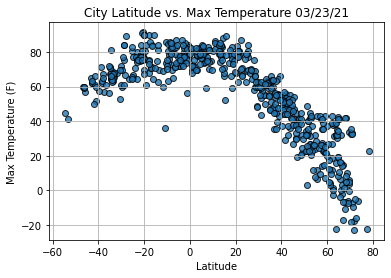

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

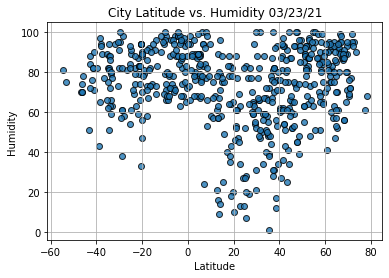

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

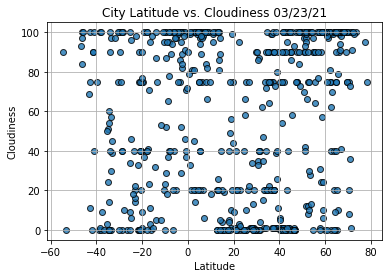

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

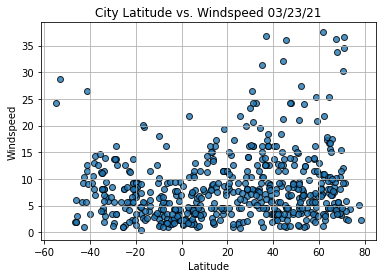

In [17]:
# Build the scatter plot for latitude vs. windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed "+ time.strftime("%x"))
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Matamoros
Country                        MX
Date          2021-03-24 02:10:24
Lat                       25.5333
Lng                       -103.25
Max Temp                       77
Humidity                        7
Cloudiness                     75
Wind Speed                  21.88
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-03-24 02:10:21,39.0500,-27.9833,54.68,53,26,6.13
1,Vostok,RU,2021-03-24 02:10:21,46.4856,135.8833,30.22,59,1,3.22
2,Orange,US,2021-03-24 02:10:22,33.7000,-117.7675,63.00,59,20,8.05
3,Hamilton,US,2021-03-24 02:05:37,39.1834,-84.5333,66.20,34,90,3.44
5,Bathsheba,BB,2021-03-24 02:10:22,13.2167,-59.5167,78.80,57,20,14.97
...,...,...,...,...,...,...,...,...,...
560,Rabo De Peixe,PT,2021-03-24 02:12:24,37.8000,-25.5833,55.40,82,20,16.11
561,Bilibino,RU,2021-03-24 02:12:24,68.0546,166.4372,8.26,87,100,3.49
562,Oksfjord,NO,2021-03-24 02:12:24,70.2396,22.3479,35.60,69,20,4.61
564,Kosino,RU,2021-03-24 02:12:25,58.4127,51.2782,14.90,99,100,5.75


In [21]:
city_data_df.loc[(city_data_df["Lat"] < 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Teahupoo,PF,2021-03-24 02:10:22,-17.8333,-149.2667,89.60,58,40,3.44
7,Port Alfred,ZA,2021-03-24 02:10:23,-33.5906,26.8910,66.74,79,97,13.91
8,Tambun,ID,2021-03-24 02:10:23,-6.2641,107.0712,87.01,70,40,9.22
10,Ushuaia,AR,2021-03-24 02:10:23,-54.8000,-68.3000,44.60,81,90,24.16
11,Merauke,ID,2021-03-24 02:10:23,-8.4667,140.3333,84.09,72,95,5.10
...,...,...,...,...,...,...,...,...,...
547,Saint-Paul,RE,2021-03-24 02:12:21,-21.0096,55.2707,75.20,83,0,8.05
550,Boyolangu,ID,2021-03-24 02:12:21,-8.1181,111.8935,78.94,79,100,0.94
557,Victor Harbor,AU,2021-03-24 02:12:23,-35.5667,138.6167,72.00,66,50,14.72
558,Hokitika,NZ,2021-03-24 02:12:23,-42.7167,170.9667,63.23,72,11,10.29


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

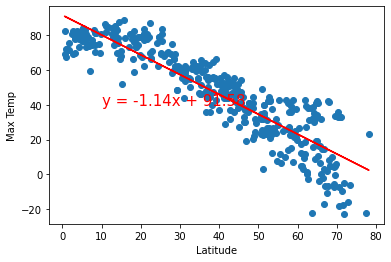

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

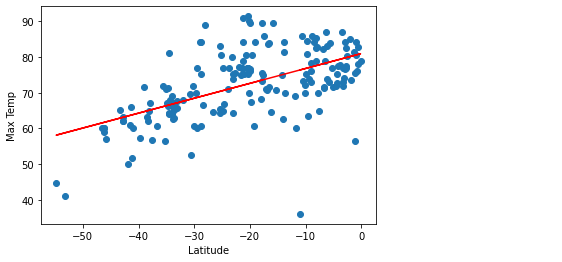

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

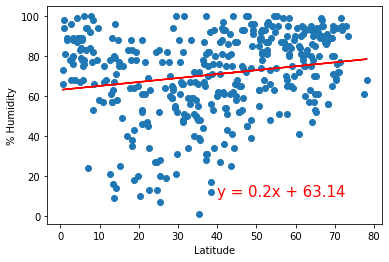

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

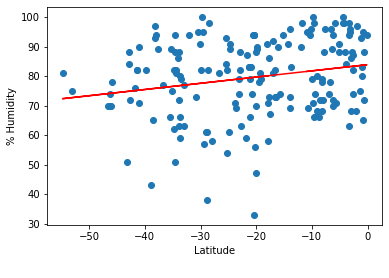

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

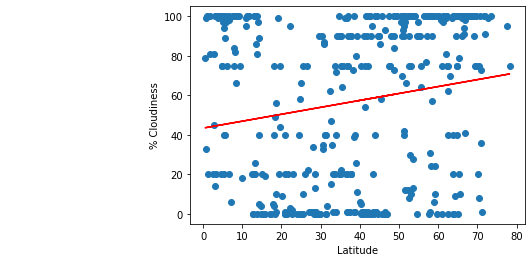

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

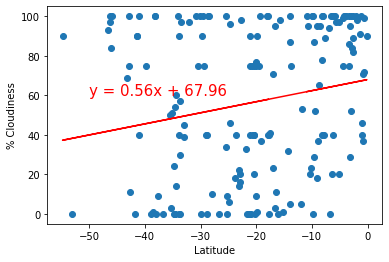

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

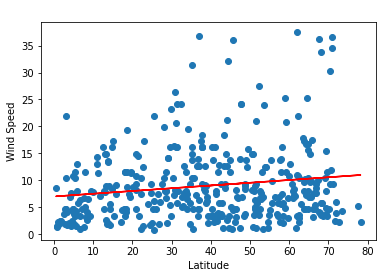

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,40))

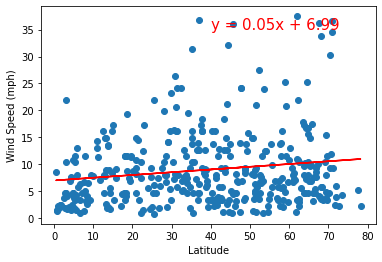

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,35))

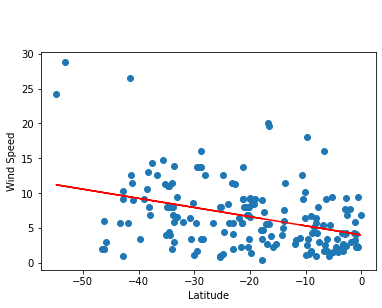

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))